<a href="https://colab.research.google.com/github/graceo246/Final-Year-project-dissertation/blob/main/Final_dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive")
!pwd

#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import f_regression
import shap



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


# Combine all datasets

In [ ]:
import pandas as pd

files = [
    "/content/drive/MyDrive/NEW FYP datasets/2018_Q2.xlsx",
    "/content/drive/MyDrive/NEW FYP datasets/2018_Q3.xlsx",
    "/content/drive/MyDrive/NEW FYP datasets/2018_Q4.xlsx",
    "/content/drive/MyDrive/NEW FYP datasets/2020_Q2.xlsx",
    "/content/drive/MyDrive/NEW FYP datasets/2020_Q3.xlsx",
    "/content/drive/MyDrive/NEW FYP datasets/2020_Q4.xlsx",
    "/content/drive/MyDrive/NEW FYP datasets/2021_Q1.xlsx",
    "/content/drive/MyDrive/NEW FYP datasets/2021_Q2.xlsx",
    "/content/drive/MyDrive/NEW FYP datasets/2021_Q3.xlsx",
    "/content/drive/MyDrive/NEW FYP datasets/2021_Q4.xlsx",
    "/content/drive/MyDrive/NEW FYP datasets/2022_Q1.xlsx",
    "/content/drive/MyDrive/NEW FYP datasets/2022_Q2.xlsx",
    "/content/drive/MyDrive/NEW FYP datasets/2022_Q3.xlsx",
    "/content/drive/MyDrive/NEW FYP datasets/2022_Q4.xlsx",
    "/content/drive/MyDrive/NEW FYP datasets/2023_Q1.xlsx",
    "/content/drive/MyDrive/NEW FYP datasets/2023_Q2.xlsx",
    "/content/drive/MyDrive/NEW FYP datasets/2023_Q3.xlsx",
    "/content/drive/MyDrive/NEW FYP datasets/2023_Q4.xlsx",
    "/content/drive/MyDrive/NEW FYP datasets/2024_Q1.xlsx",
    "/content/drive/MyDrive/NEW FYP datasets/2024_Q2.xlsx",
    "/content/drive/MyDrive/NEW FYP datasets/2024_Q3.xlsx"
]

sheet_columns = {





    "A6" : ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%",
            "16-17", "16-17%", "18-24", "18-24%", "25-34", "25-34%", "35-44", "35-44%", "45-54", "45-54%", "55-64", "55-64%",
            "65-74", "65-74%", "75+", "75+%", "Not known2", "Not known2%"],

    "A8": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%", "Total", "Total%",
       "White: English / Welsh / Scottish / Northern Irish / British", "White: English / Welsh / Scottish / Northern Irish / British%",
       "White: Irish", "White: Irish%", "White: Gypsy or Irish Traveller", "White: Gypsy or Irish Traveller%",
       "Any other White ethnic group", "Any other White ethnic group%", "White Total", "White Total%",
       "Black / African / Caribbean / Black British: African", "Black / African / Caribbean / Black British: African%",
       "Black / African / Caribbean / Black British: Caribbean", "Black / African / Caribbean / Black British: Caribbean%",
       "Any other Black / African / Caribbean background", "Any other Black / African / Caribbean background%",
       "Black Total", "Black Total%", "Asian / Asian British: Pakistani", "Asian / Asian British: Pakistani%",
       "Asian / Asian British: Indian", "Asian / Asian British: Indian%", "Asian / Asian British: Bangladeshi",
       "Asian / Asian British: Bangladeshi%", "Asian / Asian British: Chinese", "Asian / Asian British: Chinese%",
       "Any other Asian background", "Any other Asian background%", "Asian Total", "Asian Total%",
       "Mixed / Multiple ethnic groups: White and Black Caribbean", "Mixed / Multiple ethnic groups: White and Black Caribbean%",
       "Mixed / Multiple ethnic groups: White and Black African", "Mixed / Multiple ethnic groups: White and Black African%",
       "Mixed / Multiple ethnic groups: White and Asian", "Mixed / Multiple ethnic groups: White and Asian%",
       "Any other Mixed / Multiple ethnic background", "Any other Mixed / Multiple ethnic background%",
       "Mixed Total", "Mixed Total%", "Other ethnic group: Arab", "Other ethnic group: Arab%",
       "Any other ethnic group", "Any other ethnic group%", "Not known3", "Not known3%"],

    "A10" : [
    "Region Code", "Location", "Total owed a prevention or relief duty1", "Full-time work",
    "Part-time work", "Student / training", "Registered unemployed", "Not registered but seeking work",
    "Not seeking work / at home", "Not working due to long-term illness / disability", "Retired", "Other",
    "Not known2"
]
}

Dataset = {sheet: [] for sheet in sheet_columns}

for file in files:
    try:
        # Get filename without extension (
        filename = file.split("/")[-1].replace(".xlsx", "")
        #Input year and quarter
        year, quarter = filename.split("_")

        sheets = pd.read_excel(file, sheet_name=None, header=None)

        for sheet_name, df in sheets.items():
            if sheet_name in sheet_columns:
                df = df.dropna(axis=1, how='all')
                df.columns = sheet_columns[sheet_name]

                # Add year and quarter columns
                df["Year"] = year
                df["Quarter"] = quarter

                Dataset[sheet_name].append(df)

    except Exception as e:
        print(f"File {file} was skipped due to error: {e}")

# Save each sheet type as its own CSV
for sheet_name, dfs in Dataset.items():
    if dfs:
        combined = pd.concat(dfs, ignore_index=True)
        combined.to_csv(f"/content/drive/MyDrive/NEW FYP datasets/{sheet_name}.csv", index=False)

print("All sheets saved as individual CSV files with Year/Quarter columns.")



/tmp/ipython-input-3089508359.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = year
/tmp/ipython-input-3089508359.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Quarter"] = quarter
/tmp/ipython-input-3089508359.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

All sheets saved as individual CSV files with Year/Quarter columns.


In [ ]:
Sheets =["A8","A6", "A10"]
Input_path= "/content/drive/MyDrive/NEW FYP datasets/"
Output_file = "/content/drive/MyDrive/NEW FYP datasets/Merged_Homelessness.xlsx"

base = pd.read_csv(f"{Input_path}A8.csv")
base.columns = base.columns.str.strip()

for sheet in Sheets:
    if sheet == "A8":
        continue
    df = pd.read_csv(f"{Input_path}{sheet}.csv")
    df.columns = df.columns.str.strip()

    df= df.rename(columns={col: f"{sheet}_{col}" for col in df.columns
                            if col not in ["Region Code", "Location", "Year", "Quarter"]})
    df = df.drop_duplicates(subset=["Region Code", "Location", "Year", "Quarter"])

    base = pd.merge(base, df, on=["Region Code", "Location", "Year", "Quarter"], how="left")
    base.to_excel(Output_file, index=False)
print(f"Final merged file saved as {Output_file}")

Final merged file saved as /content/drive/MyDrive/NEW FYP datasets/Merged_Homelessness.xlsx


# Data cleaning

In [ ]:
df= pd.read_excel("/content/drive/MyDrive/NEW FYP datasets/Merged_Homelessness.xlsx")

In [ ]:
print(df.head())

  Region Code         Location Total owed a prevention or relief duty1  \
0   E92000001          ENGLAND                                   61210   
1   E12000007           London                                   12590   
2           -  Rest of England                                   48630   
3         NaN              NaN                                     NaN   
4   E12000001       North East                                    3550   

  Total owed a prevention or relief duty1%  Total               Total%  \
0                                        1  43510   0.7108315634700212   
1                                        1   3910  0.31056393963463064   
2                                        1  39600   0.8143121529919802   
3                                      NaN    NaN                  NaN   
4                                        1   3110   0.8760563380281691   

  White: English / Welsh / Scottish / Northern Irish / British  \
0                                           

In [ ]:
df=df[df['Location'].notna() &(df['Location'].str.strip() != "")]


In [ ]:
#Remove symbols in dataset and replace them with null
df.replace(['..', '_', '-'], 0, inplace=True)

In [ ]:

# Convert String columns
df[['Region Code', 'Location', 'Quarter']] = df[['Region Code', 'Location', 'Quarter']].astype('string')

# Convert rest of columns to numeric first
other_cols = df.columns.difference(['Region Code', 'Location', 'Quarter'])
df[other_cols] = (
    df[other_cols]
    .apply(pd.to_numeric, errors='coerce')
    .replace([np.inf, -np.inf], np.nan)
)

# Detect which columns have any non-integer values
float_cols = [col for col in other_cols if not (df[col].dropna() % 1 == 0).all()]
int_cols = list(set(other_cols) - set(float_cols))

# Convert columns to either int or float
df[int_cols] = df[int_cols].astype('Int64')
df[float_cols] = df[float_cols].astype('float64')


In [ ]:
print(df.dtypes)

Region Code                                              string[python]
Location                                                 string[python]
Total owed a prevention or relief duty1                           Int64
Total owed a prevention or relief duty1%                          Int64
Total                                                             Int64
                                                              ...      
A10_Not seeking work / at home                                    Int64
A10_Not working due to long-term illness / disability             Int64
A10_Retired                                                       Int64
A10_Other                                                         Int64
A10_Not known2                                                    Int64
Length: 85, dtype: object


In [ ]:
print(df.isnull().sum())

Region Code                                              0
Location                                                 0
Total owed a prevention or relief duty1                  0
Total owed a prevention or relief duty1%                 7
Total                                                    0
                                                        ..
A10_Not seeking work / at home                           0
A10_Not working due to long-term illness / disability    0
A10_Retired                                              0
A10_Other                                                0
A10_Not known2                                           0
Length: 85, dtype: int64


In [ ]:
#If Region code does not exist, replace them with Not Available
df['Region Code'] = df['Region Code'].fillna('Not Available')


In [ ]:
df=df.fillna(0)

In [ ]:
print(df.isnull().sum())

Region Code                                              0
Location                                                 0
Total owed a prevention or relief duty1                  0
Total owed a prevention or relief duty1%                 0
Total                                                    0
                                                        ..
A10_Not seeking work / at home                           0
A10_Not working due to long-term illness / disability    0
A10_Retired                                              0
A10_Other                                                0
A10_Not known2                                           0
Length: 85, dtype: int64


In [ ]:
df=df.drop(df.filter(like='%').columns,axis=1)
df=df.drop(df.filter(like='Not known').columns,axis=1)
df=df.drop(df.filter(like='Prefer not to say').columns,axis=1)
df=df.drop(df.filter(like='Other').columns,axis=1)

In [ ]:
pr_duty= [

    "A6_Total owed a prevention or relief duty1",
    "Total owed a prevention or relief duty1",
    "A10_Total owed a prevention or relief duty1"

]


df["Total owed a prevention or relief duty"]= df[pr_duty].bfill(axis=1).ffill(axis=1).iloc[:, 0]
df=df.drop(columns=pr_duty)

In [ ]:
Aggregates= ["England","ENGLAND", "Rest of England", "London","North East", "North West", "East Midlands", "West Midlands", "East of England", "South East", "South West", "Yorkshire and The Humber"]

df = df[~df['Location'].isin(Aggregates)]
df=df.reset_index(drop=True)

In [ ]:
print(df.head())

  Region Code      Location  Total  \
0   E07000223          Adur     28   
1   E07000026     Allerdale     91   
2   E07000032  Amber Valley    174   
3   E07000224          Arun    252   
4   E07000170      Ashfield    102   

   White: English / Welsh / Scottish / Northern Irish / British  White: Irish  \
0                                                 27                        0   
1                                                 88                        1   
2                                                170                        2   
3                                                230                        0   
4                                                102                        0   

   White: Gypsy or Irish Traveller  Any other White ethnic group  White Total  \
0                                0                             1            1   
1                                1                             1            0   
2                                0       

In [ ]:
cleaned_homeless = "/content/drive/MyDrive/NEW FYP datasets/Cleaned_Merged.csv"
df.to_csv(cleaned_homeless, index=False)

# Data exploration

In [ ]:
df = pd.read_csv(cleaned_homeless)


print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 6494
Number of columns: 43


In [ ]:
df.describe()

,Total,White: English / Welsh / Scottish / Northern Irish / British,White: Irish,White: Gypsy or Irish Traveller,Any other White ethnic group,White Total,Black / African / Caribbean / Black British: African,Black / African / Caribbean / Black British: Caribbean,Any other Black / African / Caribbean background,Black Total,...,A6_75+,A10_Full-time work,A10_Part-time work,A10_Student / training,A10_Registered unemployed,A10_Not registered but seeking work,A10_Not seeking work / at home,A10_Not working due to long-term illness / disability,A10_Retired,Total owed a prevention or relief duty
count,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,...,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000
mean,151.803665,137.409301,1.226055,0.604866,12.593625,23.511549,14.780567,6.106406,2.624577,14.740222,...,2.260394,30.802587,24.432553,3.495072,76.442408,8.365722,16.737604,33.190022,6.227595,215.662458
std,133.884811,126.114458,2.027994,1.060476,16.688652,55.673376,34.879786,17.992484,6.654075,34.870040,...,2.736001,29.741789,27.023471,5.043463,99.244390,12.243074,18.844713,30.740633,5.797598,224.671323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66.000000,58.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,12.000000,9.000000,0.000000,19.000000,2.000000,5.000000,12.000000,2.000000,74.000000
50%,112.000000,97.000000,0.000000,0.000000,7.000000,3.000000,2.000000,1.000000,0.000000,3.000000,...,2.000000,22.000000,16.000000,2.000000,39.000000,4.000000,11.000000,23.000000,5.000000,139.000000
75%,194.000000,176.000000,2.000000,1.000000,16.000000,15.000000,9.000000,3.000000,2.000000,11.000000,...,3.000000,39.000000,30.000000,4.000000,96.000000,10.000000,21.000000,45.000000,8.000000,282.000000
max,1149.000000,1107.000000,27.000000,10.000000,158.000000,518.000000,349.000000,241.000000,94.000000,363.000000,...,52.000000,275.000000,256.000000,62.000000,962.000000,195.000000,240.000000,239.000000,83.000000,1857.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6494 entries, 0 to 6493
Data columns (total 43 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Region Code                                                   6494 non-null   object
 1   Location                                                      6494 non-null   object
 2   Total                                                         6494 non-null   int64 
 3   White: English / Welsh / Scottish / Northern Irish / British  6494 non-null   int64 
 4   White: Irish                                                  6494 non-null   int64 
 5   White: Gypsy or Irish Traveller                               6494 non-null   int64 
 6   Any other White ethnic group                                  6494 non-null   int64 
 7   White Total                                                   6494 non-null   

# EDA


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/NEW FYP datasets/Cleaned_Merged.csv")

In [ ]:
grouped_data_year = df.groupby(['Year'])[['Total owed a prevention or relief duty']].mean().reset_index()

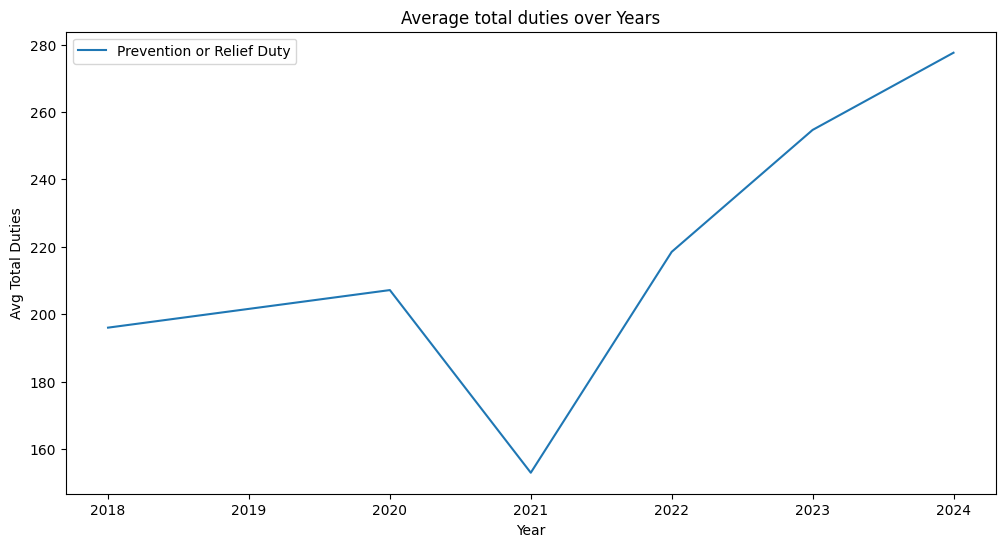

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total owed a prevention or relief duty', data=grouped_data_year, label='Prevention or Relief Duty')
plt.title('Average total duties over Years')
plt.xlabel('Year')
plt.ylabel('Avg Total Duties')
plt.legend()
plt.show()

In [ ]:
agg_df= df.groupby('Year')['Total owed a prevention or relief duty'].agg(['mean', 'sum', 'count']).reset_index()
agg_df['Sum_change'] = agg_df['sum'].pct_change() * 100
agg_df['Mean_change'] = agg_df['mean'].pct_change() * 100

agg_df[['Sum_change', 'Mean_change']] = agg_df[['Sum_change', 'Mean_change']].round(2)
print(agg_df[['Year', 'sum','Sum_change', 'mean', 'Mean_change']])


   Year     sum  Sum_change        mean  Mean_change
0  2018  191690         NaN  196.002045          NaN
1  2020  197620        3.09  207.148847         5.69
2  2021  189814       -3.95  152.952458       -26.16
3  2022  270056       42.27  218.491909        42.85
4  2023  304839       12.88  254.669173        16.56
5  2024  246493      -19.14  277.582207         9.00


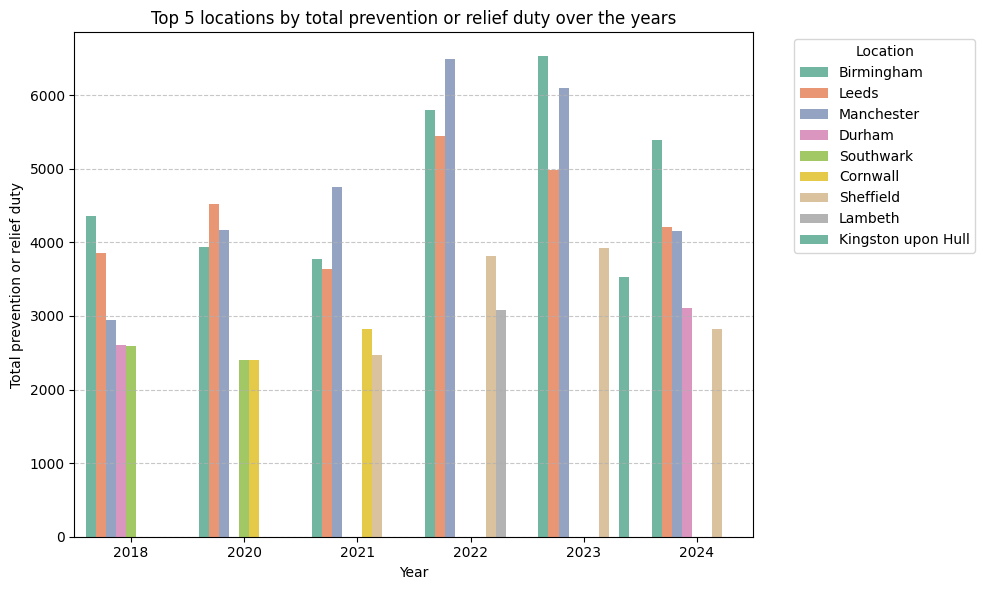

In [ ]:
Grouped = df.groupby(["Year", "Location"])["Total owed a prevention or relief duty"].sum().reset_index()
Grouped_sorted= Grouped.sort_values(["Year","Total owed a prevention or relief duty"], ascending=[True,False])
Top_5=Grouped_sorted.groupby("Year").head(5).reset_index(drop=True)

Top_locations =(Top_5.groupby("Location")["Year"]
                .count()
                .reset_index()
                .rename(columns={"Year": "Years in Top 5"})
                .sort_values("Years in Top 5",ascending=False))


plt.figure(figsize=(10, 6))
sns.barplot(x="Year", y="Total owed a prevention or relief duty", data=Top_5, palette="Set2", hue="Location")
plt.title("Top 5 locations by total prevention or relief duty over the years")
plt.xlabel("Year")
plt.ylabel("Total prevention or relief duty")
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle= '--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
grouped_data_quarter = df.groupby(['Year', 'Quarter'])[['Total owed a prevention or relief duty']].mean().reset_index()

/tmp/ipython-input-604509750.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Quarter', y='Total owed a prevention or relief duty', data=grouped_data_quarter, color='red',ci=None)


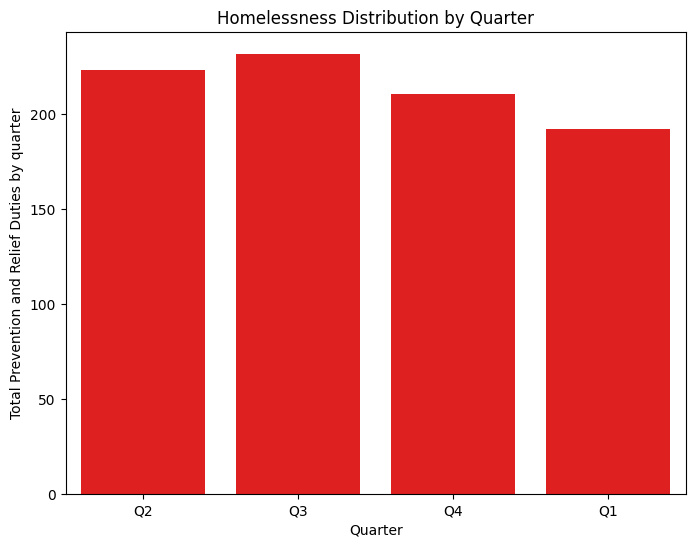

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Quarter', y='Total owed a prevention or relief duty', data=grouped_data_quarter, color='red',ci=None)
plt.title('Homelessness Distribution by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Prevention and Relief Duties by quarter')
plt.show()

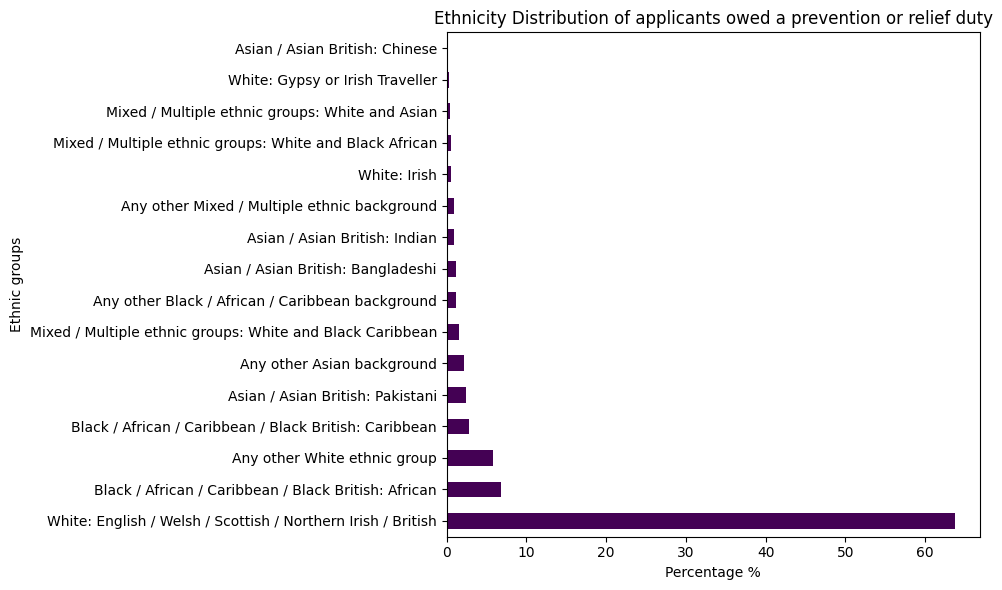

In [ ]:
Ethnicity = [
    "White: English / Welsh / Scottish / Northern Irish / British",
    "White: Irish",
    "White: Gypsy or Irish Traveller",
    "Any other White ethnic group",
    "Black / African / Caribbean / Black British: African",
    "Black / African / Caribbean / Black British: Caribbean",
    "Any other Black / African / Caribbean background",
    "Asian / Asian British: Pakistani",
    "Asian / Asian British: Indian",
    "Asian / Asian British: Bangladeshi",
    "Asian / Asian British: Chinese",
    "Any other Asian background",
    "Mixed / Multiple ethnic groups: White and Black Caribbean",
    "Mixed / Multiple ethnic groups: White and Black African",
    "Mixed / Multiple ethnic groups: White and Asian",
    "Any other Mixed / Multiple ethnic background",
    ]

Ethnicity_count = df[Ethnicity].sum().sort_values(ascending=False)
Ethnic_duties=df["Total owed a prevention or relief duty"].sum()
Ethnicity_percent = (Ethnicity_count / Ethnic_duties * 100).round(2)

Ethnicity_percent.plot(kind="barh", figsize=(10,6), colormap="viridis")
plt.title('Ethnicity Distribution of applicants owed a prevention or relief duty')
plt.xlabel('Percentage %')
plt.ylabel('Ethnic groups')
plt.tight_layout()
plt.show()

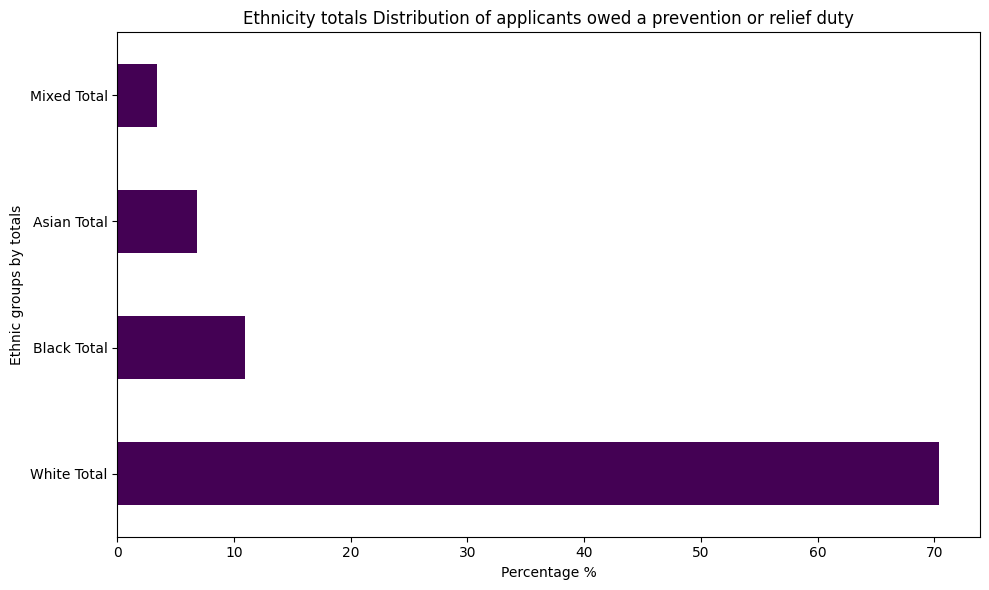

In [ ]:
Ethnicity_totals = [
   "White Total",
    "Black Total",
    "Asian Total",
    "Mixed Total",

    ]

Ethnicity_count = df[Ethnicity_totals].sum().sort_values(ascending=False)
Ethnic_duties=df["Total owed a prevention or relief duty"].sum()
Ethnicity_percent = (Ethnicity_count / Ethnic_duties * 100).round(2)

Ethnicity_percent.plot(kind="barh", figsize=(10,6), colormap="viridis")
plt.title('Ethnicity totals Distribution of applicants owed a prevention or relief duty')
plt.xlabel('Percentage %')
plt.ylabel('Ethnic groups by totals')
plt.tight_layout()
plt.show()

In [ ]:
Ethnicity_grouped =df.groupby("Year")[Ethnicity_totals].sum()
top_Ethnicity = []

for year, row in Ethnicity_grouped.iterrows():
    top_Ethnicity_row = row.idxmax()
    top_val= row.max()
    top_Ethnicity.append({"Year": year, "Top Ethnicity group": top_Ethnicity_row, "Total Duties": top_val})

top_Ethnicity_df = pd.DataFrame(top_Ethnicity)
print(top_Ethnicity_df)

   Year Top Ethnicity group  Total Duties
0  2018         White Total        135889
1  2020         White Total        139869
2  2021         White Total        175427
3  2022         White Total        183586
4  2023         White Total        196951
5  2024         White Total        154287


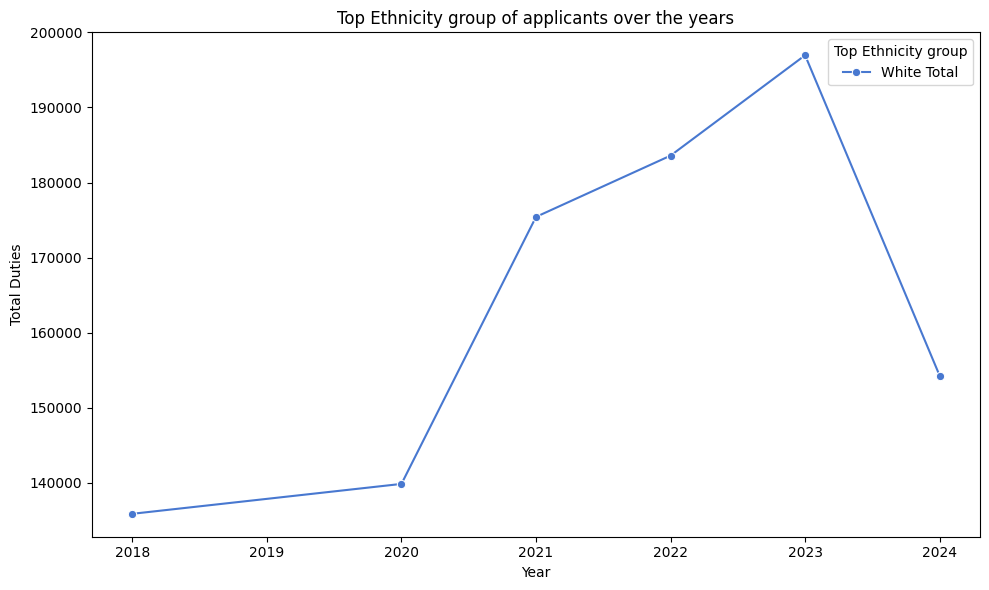

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_Ethnicity_df, x="Year", y="Total Duties", marker='o', hue="Top Ethnicity group", palette='muted')
plt.title('Top Ethnicity group of applicants over the years')
plt.xlabel('Year')
plt.ylabel('Total Duties')
plt.tight_layout()
plt.show()

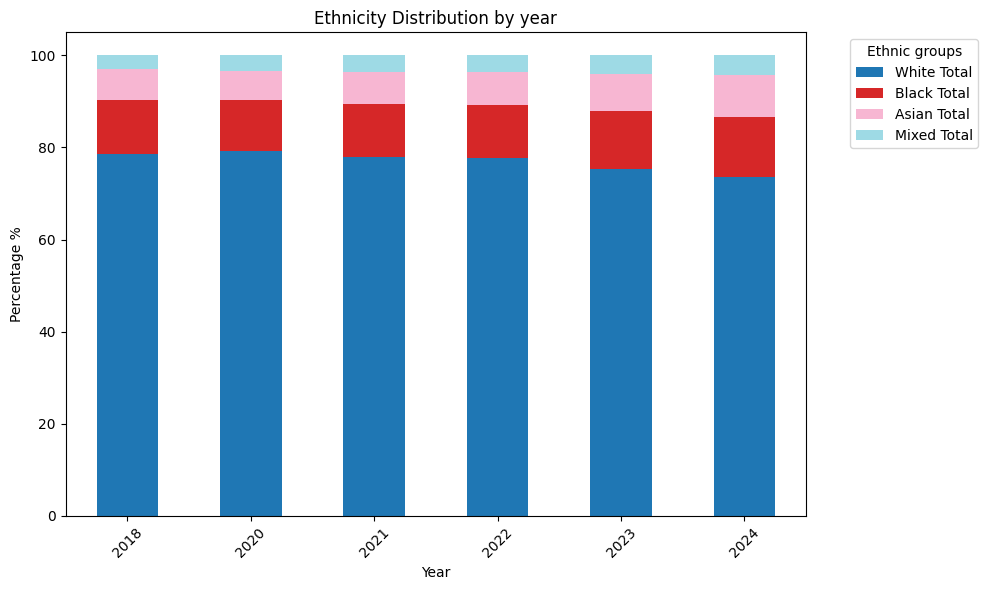

In [ ]:
Key = df["Year"]

Grouped=df.groupby(Key)[Ethnicity_totals].sum()
Grouped_percent=Grouped.div(Grouped.sum(axis=1), axis=0)*100

Grouped_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Ethnicity Distribution by year')
plt.xlabel('Year')
plt.ylabel('Percentage %')
plt.xticks(rotation=45)
plt.legend(title='Ethnic groups', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1942260594.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Age_percent_sort.index, y=Age_percent_sort.values, palette="pastel")


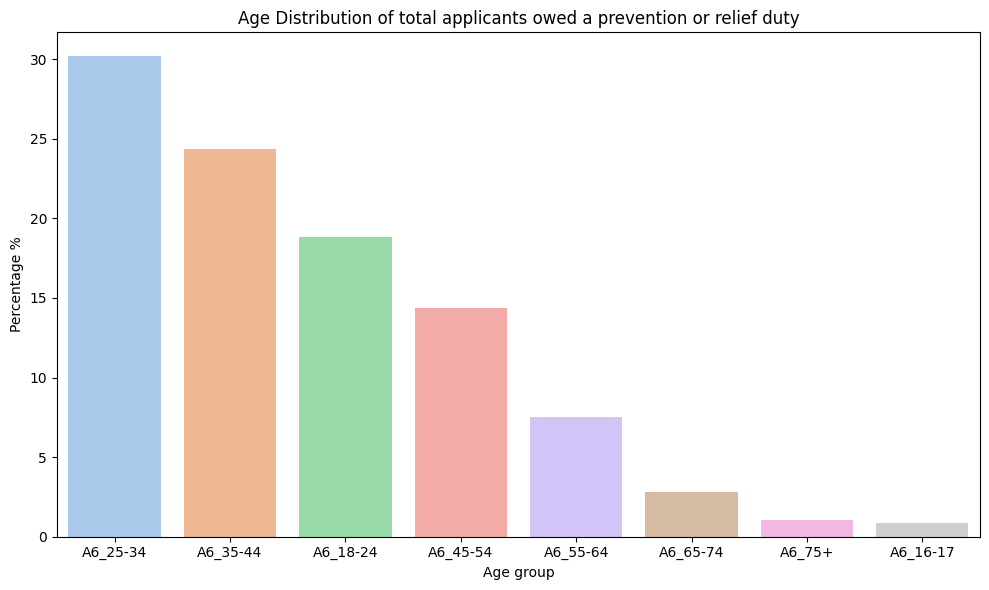

In [ ]:
Age =["A6_16-17",
    "A6_18-24",
    "A6_25-34",
    "A6_35-44",
    "A6_45-54",
    "A6_55-64",
    "A6_65-74",
    "A6_75+",
    ]


Age_percent = (df[Age].sum() / df["Total owed a prevention or relief duty"].sum() * 100).round(2)
Age_percent_sort = Age_percent.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=Age_percent_sort.index, y=Age_percent_sort.values, palette="pastel")
plt.title('Age Distribution of total applicants owed a prevention or relief duty')
plt.xlabel('Age group')
plt.ylabel('Percentage %')
plt.tight_layout()
plt.show()



In [ ]:
age_grouped =df.groupby("Year")[Age].sum()
top_age = []

for year, row in age_grouped.iterrows():
    top_age_row = row.idxmax()
    top_val= row.max()
    top_age.append({"Year": year, "Top Age group": top_age_row, "Total Duties": top_val})

top_age_df = pd.DataFrame(top_age)
print(top_age_df)

   Year Top Age group  Total Duties
0  2018      A6_25-34         60069
1  2020      A6_25-34         62227
2  2021      A6_25-34         58288
3  2022      A6_25-34         80635
4  2023      A6_25-34         89723
5  2024      A6_25-34         71576


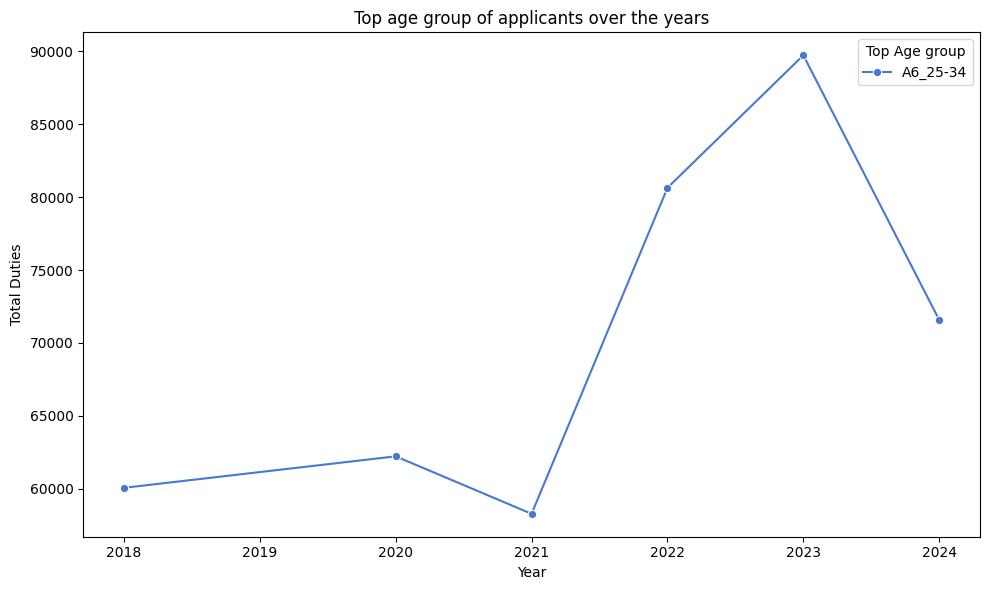

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_age_df, x="Year", y="Total Duties", marker='o', hue="Top Age group", palette='muted')
plt.title('Top age group of applicants over the years')
plt.xlabel('Year')
plt.ylabel('Total Duties')
plt.tight_layout()
plt.show()

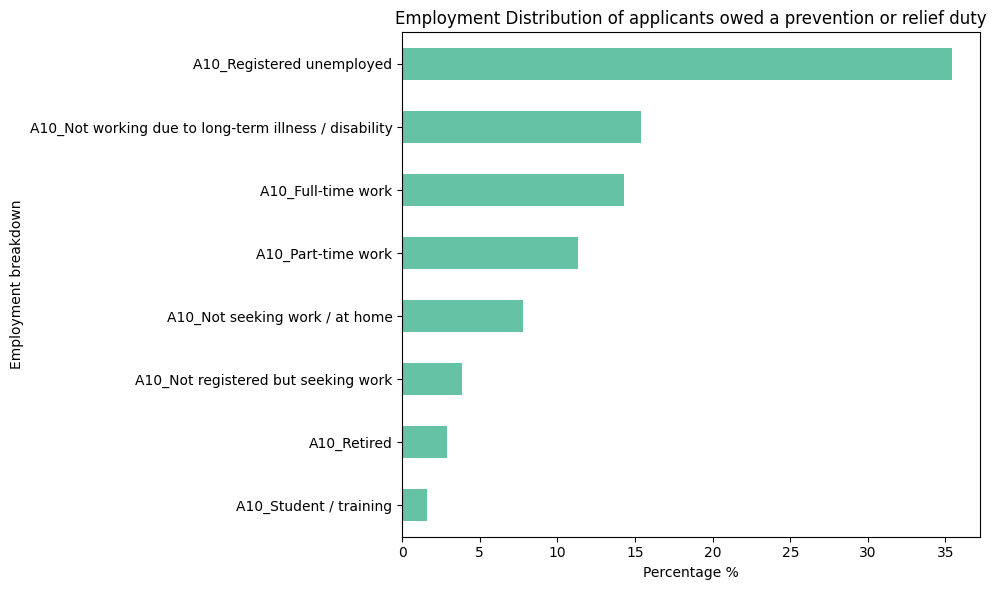

In [ ]:
Employment =["A10_Full-time work",
    "A10_Part-time work",
    "A10_Student / training",
    "A10_Registered unemployed",
    "A10_Not registered but seeking work",
    "A10_Not seeking work / at home",
    "A10_Not working due to long-term illness / disability",
    "A10_Retired"]


Employment_count = df[Employment].sum().sort_values(ascending= True)
Employment_duties=df["Total owed a prevention or relief duty"].sum()
Employment_percent = (Employment_count / Employment_duties * 100).round(2)

Employment_percent.plot(kind="barh", figsize=(10,6), colormap='Set2')
plt.title('Employment Distribution of applicants owed a prevention or relief duty')
plt.xlabel('Percentage %')
plt.ylabel('Employment breakdown')
plt.tight_layout()
plt.show()


In [ ]:
Employment_grouped =df.groupby("Year")[Employment].sum()
top_Employment = []

for year, row in Employment_grouped.iterrows():
    top_Employment_row = row.idxmax()
    top_val= row.max()
    top_Employment.append({"Year": year, "Top Employment group": top_Employment_row, "Total Duties": top_val})

top_Employment_df = pd.DataFrame(top_Employment)
print(top_Employment_df)

   Year       Top Employment group  Total Duties
0  2018  A10_Registered unemployed         46941
1  2020  A10_Registered unemployed         68749
2  2021  A10_Registered unemployed         95725
3  2022  A10_Registered unemployed         91567
4  2023  A10_Registered unemployed        104806
5  2024  A10_Registered unemployed         88629


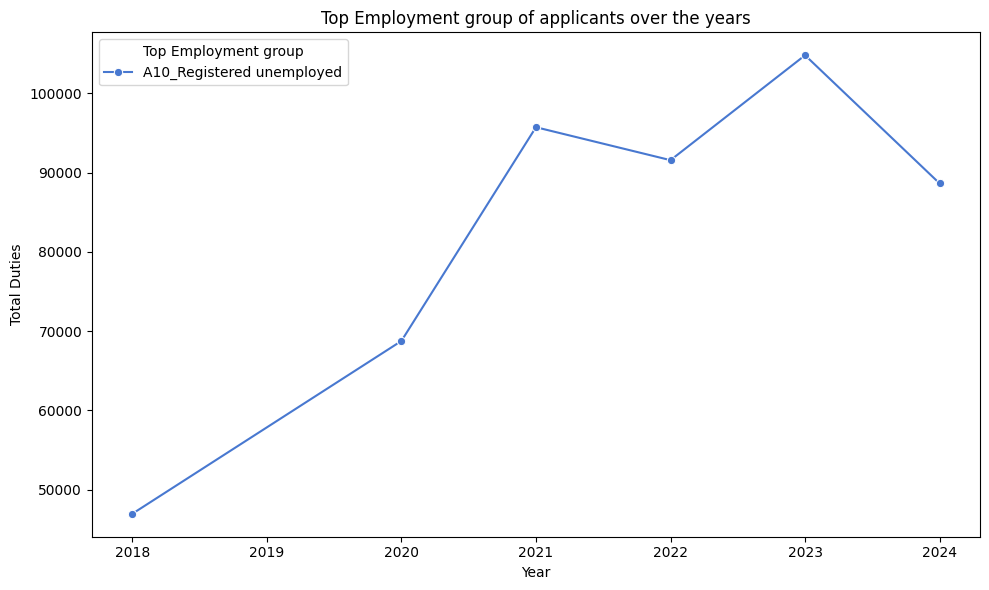

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_Employment_df, x="Year", y="Total Duties", marker='o', hue="Top Employment group", palette='muted')
plt.title('Top Employment group of applicants over the years')
plt.xlabel('Year')
plt.ylabel('Total Duties')
plt.tight_layout()
plt.show()

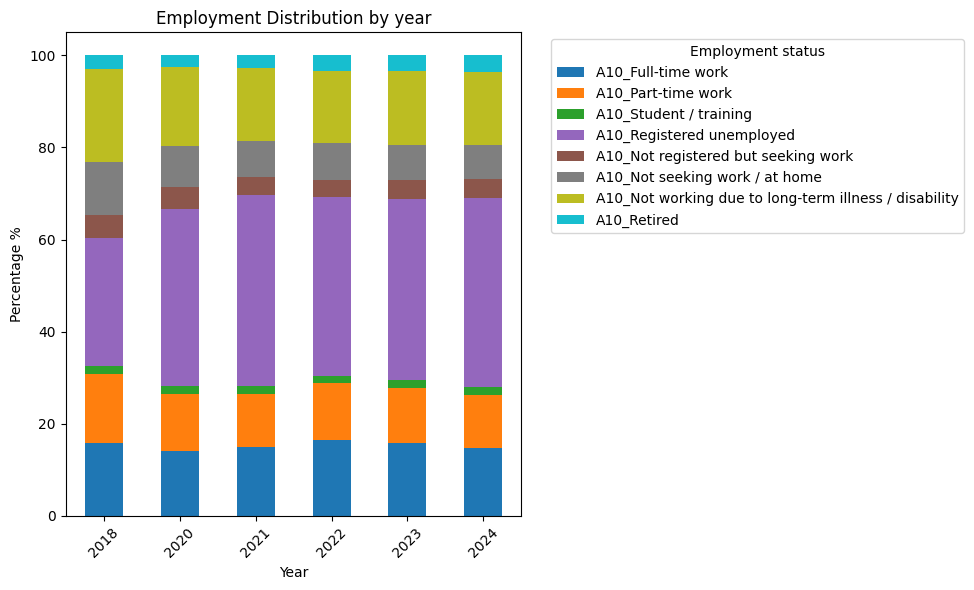

In [ ]:
Key = df["Year"]

Grouped=df.groupby(Key)[Employment].sum()
Grouped_percent=Grouped.div(Grouped.sum(axis=1), axis=0)*100
#Grouped_percent=Grouped_percent.round(2)

Grouped_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab10')
plt.title('Employment Distribution by year')
plt.xlabel('Year')
plt.ylabel('Percentage %')
plt.xticks(rotation=45)
plt.legend(title='Employment status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


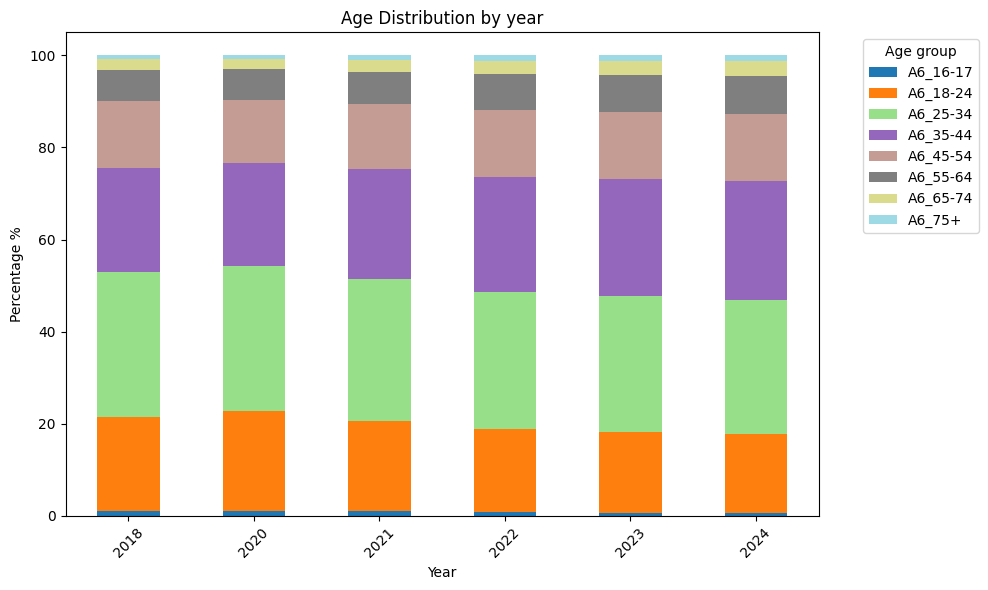

In [ ]:

Key = df["Year"]

Grouped=df.groupby(Key)[Age].sum()
Grouped_percent=Grouped.div(Grouped.sum(axis=1), axis=0)*100
#Grouped_percent=Grouped_percent.round(2)

Grouped_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Age Distribution by year')
plt.xlabel('Year')
plt.ylabel('Percentage %')
plt.xticks(rotation=45)
plt.legend(title='Age group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



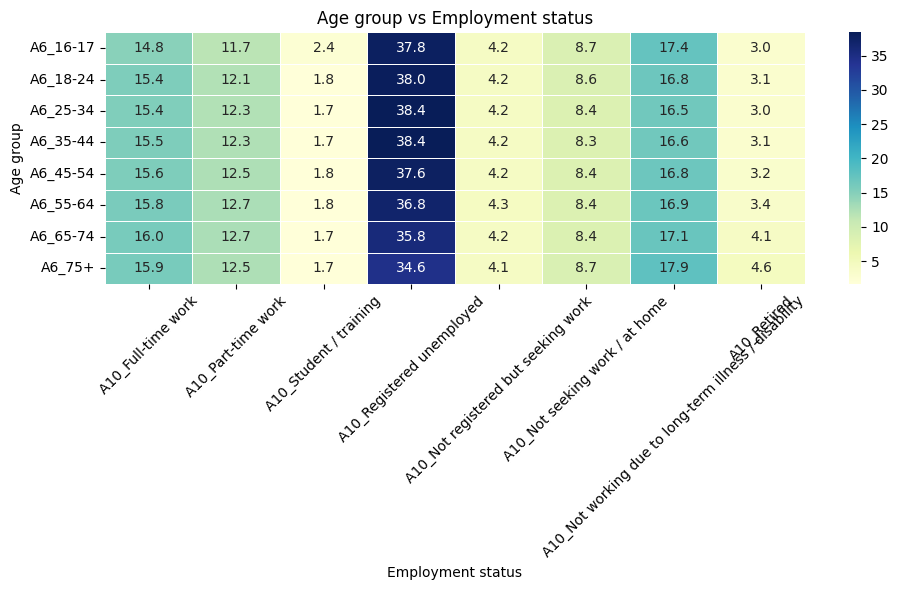

In [ ]:
Age_totals=df[Age].sum(axis=1)
proportions=pd.DataFrame(index=Age, columns=Employment)

for Age_col in Age:
    Age_proportion=df[Age_col]/Age_totals
    for Employment_col in Employment:
      Sum =(Age_proportion*df[Employment_col]).sum()
      proportions.loc[Age_col, Employment_col]=Sum

perecntages=proportions.div(proportions.sum(axis=1), axis=0)*100
perecntages=perecntages.astype(float).round(2)

plt.figure(figsize=(10, 6))
sns.heatmap(perecntages, annot=True, cmap='YlGnBu', fmt= ".1f", linewidths=0.5)

plt.title("Age group vs Employment status")
plt.xlabel("Employment status")
plt.ylabel("Age group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




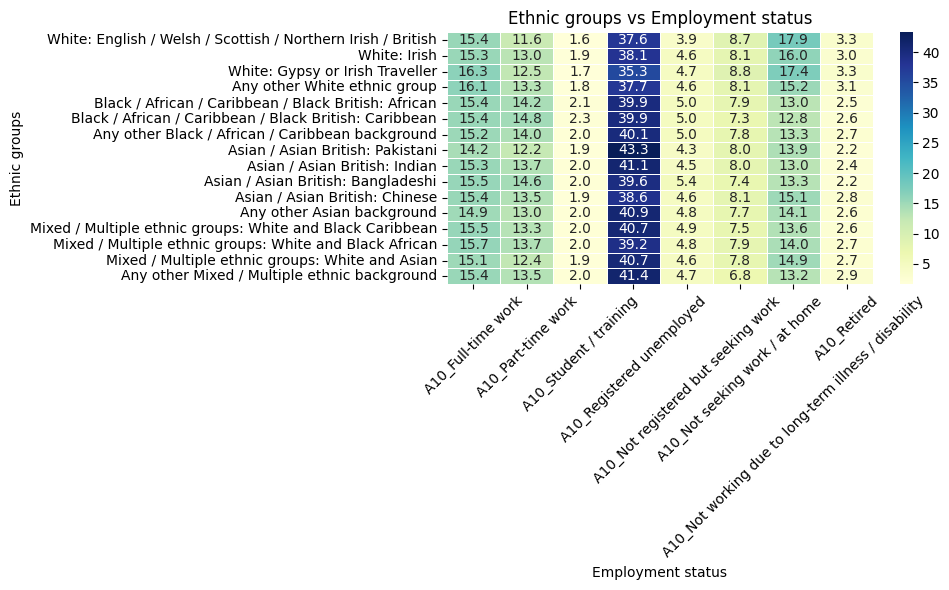

In [ ]:
Ethnicity_totals=df[Ethnicity].sum(axis=1)
proportions=pd.DataFrame(index=Ethnicity, columns=Employment)

for Ethnicity_col in Ethnicity:
    Ethnicity_proportion=df[Ethnicity_col]/Ethnicity_totals
    for Employment_col in Employment:
      Sum =(Ethnicity_proportion*df[Employment_col]).sum()
      proportions.loc[Ethnicity_col, Employment_col]=Sum

perecntages=proportions.div(proportions.sum(axis=1), axis=0)*100
perecntages=perecntages.astype(float).round(2)

plt.figure(figsize=(10, 6))
sns.heatmap(perecntages, annot=True, cmap='YlGnBu', fmt= ".1f", linewidths=0.5)

plt.title("Ethnic groups vs Employment status")
plt.xlabel("Employment status")
plt.ylabel("Ethnic groups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

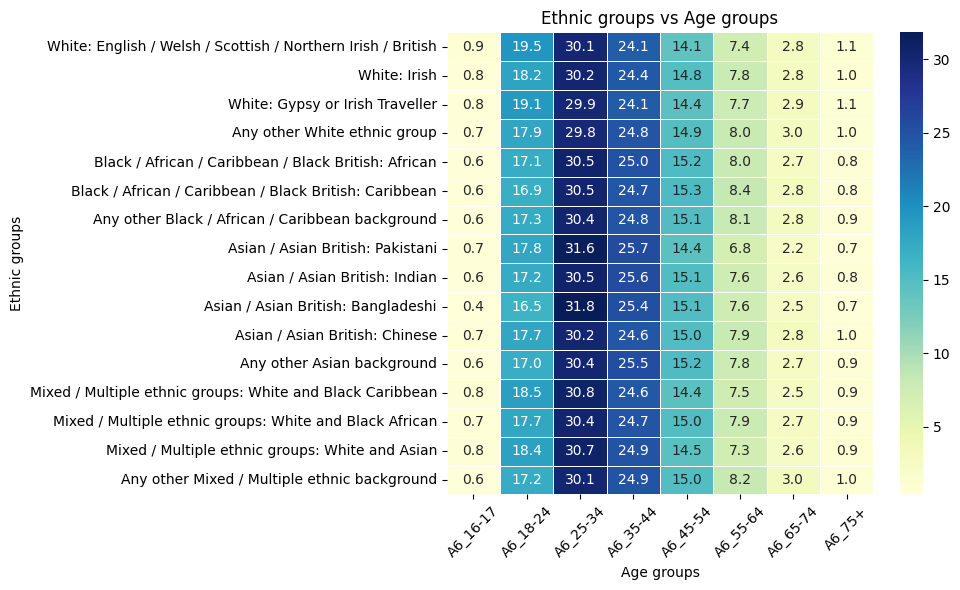

In [ ]:
Ethnicity_totals=df[Ethnicity].sum(axis=1)
proportions=pd.DataFrame(index=Ethnicity, columns=Age)

for Ethnicity_col in Ethnicity:
    Ethnicity_proportion=df[Ethnicity_col]/Ethnicity_totals
    for Age_col in Age:
      Sum =(Ethnicity_proportion*df[Age_col]).sum()
      proportions.loc[Ethnicity_col, Age_col]=Sum

perecntages=proportions.div(proportions.sum(axis=1), axis=0)*100
perecntages=perecntages.astype(float).round(2)

plt.figure(figsize=(10, 6))
sns.heatmap(perecntages, annot=True, cmap='YlGnBu', fmt= ".1f", linewidths=0.5)

plt.title("Ethnic groups vs Age groups")
plt.xlabel("Age groups")
plt.ylabel("Ethnic groups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Statistical analysis

#Prepare dataset for analysis


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/NEW FYP datasets/Cleaned_Merged.csv")

Age_cols= ["A6_16-17",
    "A6_18-24",
    "A6_25-34",
    "A6_35-44",
    "A6_45-54",
    "A6_55-64",
    "A6_65-74",
    "A6_75+"]

df['Age_total'] = df[Age_cols].sum(axis=1)
for col in Age_cols:
    df[f'%_{col}'] = df[col] / df['Age_total']

Ethnicity_cols = {
   "White":"White Total",
    "Black":"Black Total",
    "Asian":"Asian Total",
    "Mixed":"Mixed Total",
   "Other": "Any other ethnic group"

}

df["Ethnicity_sum"]=df[list(Ethnicity_cols.values())].sum(axis=1)
for label, col in Ethnicity_cols.items():
    df[f'%_{label}'] = df[col] / df['Ethnicity_sum']



Employment_cols =["A10_Full-time work",
    "A10_Part-time work",
    "A10_Student / training",
    "A10_Registered unemployed",
    "A10_Not registered but seeking work",
    "A10_Not seeking work / at home",
    "A10_Not working due to long-term illness / disability",
    "A10_Retired"]

df['Employment_total'] = df[Employment_cols].sum(axis=1)
for col in Employment_cols:
    df[f'%_{col}'] = df[col] / df['Employment_total']

df.drop(columns=['%_A10_Student / training', '%_A6_16-17','%_White'], inplace=True)

Save =["Region Code", "Location", "Year", "Quarter", "Total owed a prevention or relief duty"] +  [col for col in df.columns if col.startswith('%_')]
df_Save=df[Save]
df_Save.to_csv("/content/drive/MyDrive/NEW FYP datasets/Analysis_dataset.csv", index=False)


# Hyperparameter tuning

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NEW FYP datasets/Analysis_dataset.csv")
df=df.replace([np.inf, -np.inf], np.nan).dropna()
X = df[[col for col in df.columns if col.startswith('%_')]]
y = df['Total owed a prevention or relief duty']



In [ ]:
RandomForest_model = RandomForestRegressor(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
params = {
    'n_estimators': [100, 200, 300],
    'max_depth' : [10,20,30,None],
    'min_samples_leaf': [1, 2,4],
    'min_samples_split': [2, 5,10],
    'max_features': ['auto','sqrt', 'log2']
}

random_forest_gridSearch = GridSearchCV(estimator=RandomForest_model, scoring= 'r2', param_grid=params, cv=3, n_jobs=-1, verbose=2)
random_forest_gridSearch.fit(X_train, y_train)


print("Randon Forest Best Parameters : ", random_forest_gridSearch.best_params_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
121 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py",

Randon Forest Best Parameters :  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


#Multiple linear regression

In [ ]:
X=sm.add_constant(X)
model = sm.OLS(y, X).fit()

Top_MLRCoefficient=model.params.drop('const').abs().sort_values(ascending=False).head(10)
Top_MLRFeatures=Top_MLRCoefficient.index
Top_MLRPvalues=model.pvalues[Top_MLRFeatures]

Results = pd.DataFrame({'Coefficient (abs)': Top_MLRCoefficient, 'P-value': Top_MLRPvalues.round(6)})
print(Results)

r2=model.rsquared
mse=mean_squared_error(y, model.predict(X))
print(f'R-squared: {r2:.2f}')
print(f'MSE: {mse:.2f}')




                                                    Coefficient (abs)  \
%_A6_75+                                                  2834.129057   
%_A6_65-74                                                2647.928554   
%_A6_55-64                                                2357.038438   
%_A6_18-24                                                2268.688893   
%_A6_45-54                                                2083.228417   
%_A6_35-44                                                1927.069592   
%_A6_25-34                                                1899.033458   
%_Black                                                    807.968948   
%_A10_Registered unemployed                                594.821590   
%_A10_Not working due to long-term illness / di...         355.304229   

                                                     P-value  
%_A6_75+                                            0.000000  
%_A6_65-74                                          0.000000  
%_A6_55

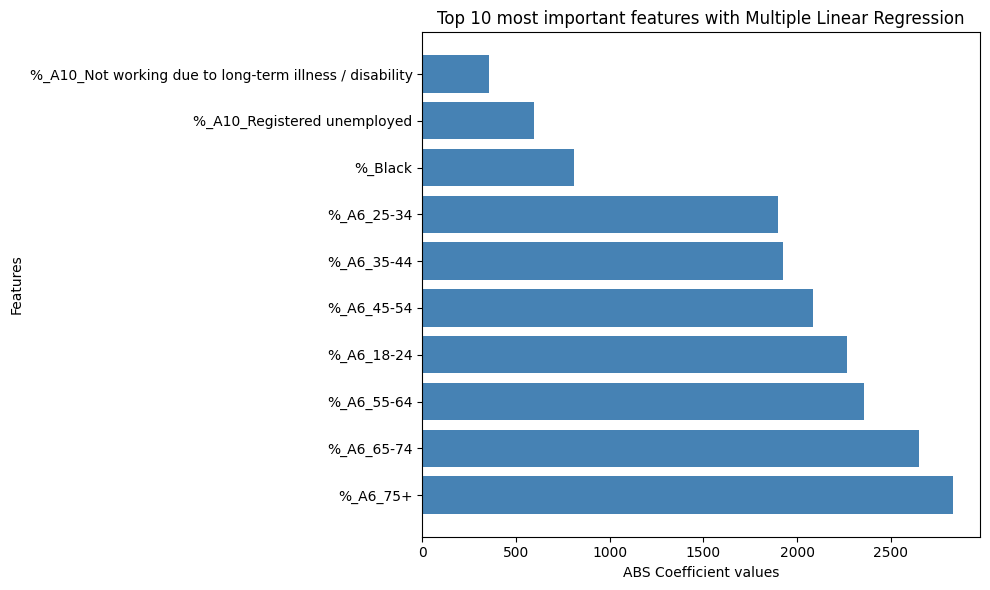

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(Top_MLRCoefficient.index, Top_MLRCoefficient.values, color='steelblue')
plt.xlabel('ABS Coefficient values')
plt.ylabel('Features')
plt.title('Top 10 most important features with Multiple Linear Regression')
plt.tight_layout()
plt.show()

#Random Forest Regressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf=RandomForestRegressor(n_estimators=300, random_state=42,max_depth=30, max_features='sqrt', min_samples_leaf=1, min_samples_split=2)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
r2=r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)

Importances=pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print(f'R-squared: {r2:.2f}')
print(f'MSE: {mse:.2f}')
print("Top 10 most importnt features:")
print(Importances.head(10))



R-squared: 0.71
MSE: 13487.23
Top 10 most importnt features:
%_Black                        0.158474
%_Other                        0.092838
%_A10_Registered unemployed    0.086879
%_Mixed                        0.084258
%_Asian                        0.080639
%_A6_75+                       0.073772
%_A10_Full-time work           0.049069
%_A10_Retired                  0.048169
%_A6_25-34                     0.040708
%_A6_65-74                     0.039093
dtype: float64


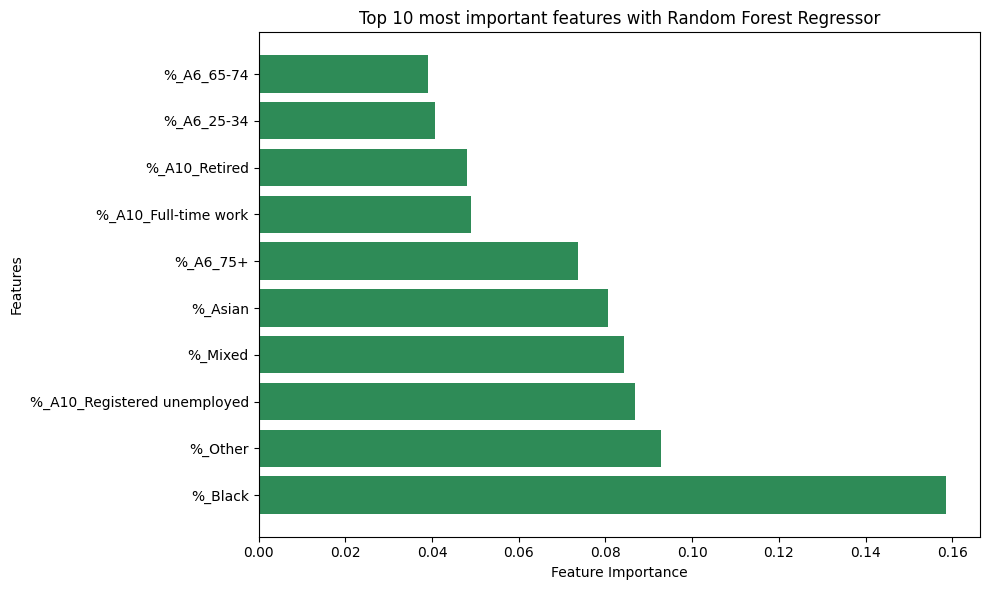

In [ ]:
Top_10=Importances.head(10)

plt.figure(figsize=(10, 6))
plt.barh(Top_10.index, Top_10.values, color='seagreen')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 most important features with Random Forest Regressor')
plt.tight_layout()
plt.show()

# Lasso Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso=Lasso(max_iter=1000)

param_grid={'alpha': [0.001, 0.001, 0.01,0.1, 1, 10, 100]}
grid_search = GridSearchCV(lasso, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

Lasso=grid_search.best_estimator_
y_pred = Lasso.predict(X_test)

print('best alpha:', grid_search.best_params_['alpha'])
print('Lasso r^2',r2_score(y_test, y_pred))
print('Lasso MSE:', mean_squared_error(y_test, y_pred))

coefficient =pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': Lasso.coef_
})

print(coefficient[coefficient['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False))

best alpha: 0.001
Lasso r^2 0.40897186406489217
Lasso MSE: 27247.55583090835
                                              Feature  Coefficient
7                                             %_Black   788.981357
13                        %_A10_Registered unemployed   588.724506
8                                             %_Asian   365.809077
17                                      %_A10_Retired   359.753179
16  %_A10_Not working due to long-term illness / d...   344.489637
9                                             %_Mixed   337.106352
14              %_A10_Not registered but seeking work   221.576900
15                   %_A10_Not seeking work / at home   166.450438
10                                            %_Other    -9.184718
12                               %_A10_Part-time work   -20.824756
11                               %_A10_Full-time work  -107.222946
2                                          %_A6_35-44 -1813.221811
1                                          %_A6_25-3

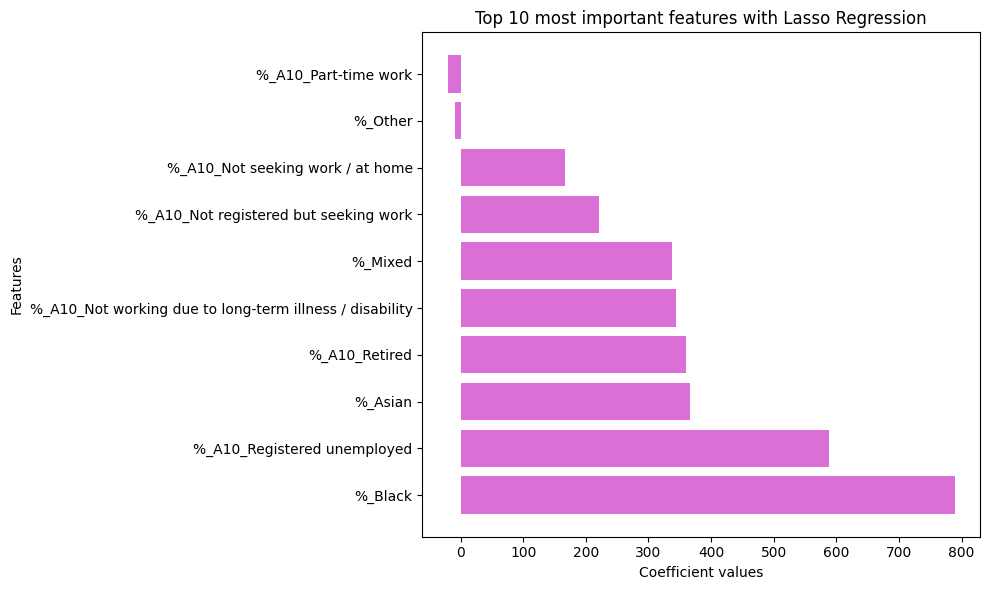

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(coefficient[coefficient['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False).head(10)['Feature'], coefficient[coefficient['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False).head(10)['Coefficient'], color='orchid')
plt.xlabel('Coefficient values')
plt.ylabel('Features')
plt.title('Top 10 most important features with Lasso Regression')
plt.tight_layout()
plt.show()

# F tests

In [ ]:
f_scores, p_values = f_regression(X, y)

f_scores_df = pd.DataFrame({'Feature': X.columns, 'F-score': f_scores, 'P-value': p_values.round(6)}).sort_values(by='F-score', ascending=False)
print(f_scores_df.head(10))


                                              Feature      F-score  P-value
8                                             %_Black  1860.584155      0.0
9                                             %_Asian  1026.045154      0.0
14                        %_A10_Registered unemployed   998.546601      0.0
10                                            %_Mixed   872.009572      0.0
11                                            %_Other   641.520486      0.0
18                                      %_A10_Retired   477.266829      0.0
12                               %_A10_Full-time work   319.910778      0.0
17  %_A10_Not working due to long-term illness / d...   258.107749      0.0
7                                            %_A6_75+   248.770880      0.0
6                                          %_A6_65-74   224.609445      0.0


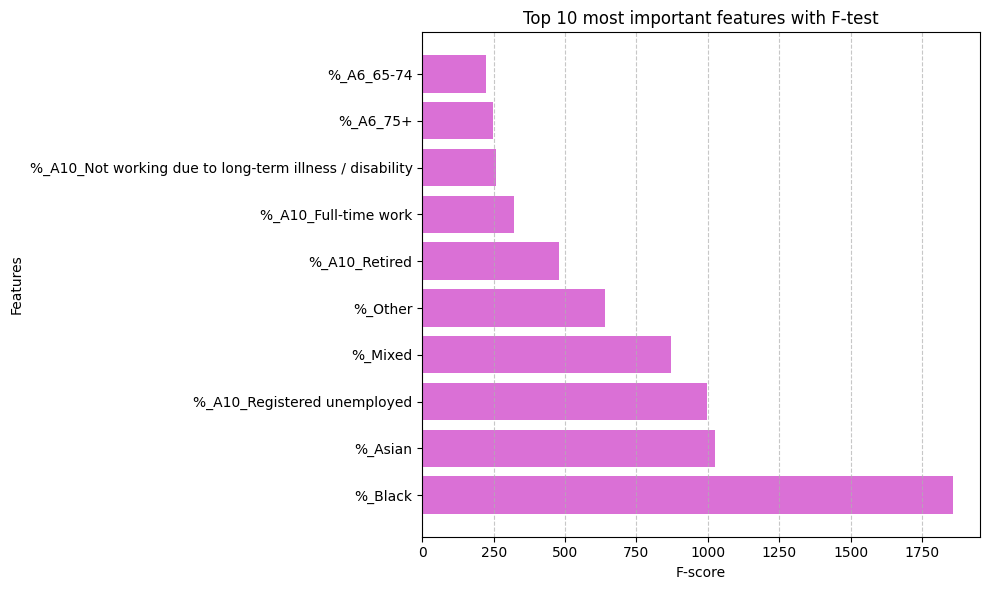

In [ ]:
Top_f1=f_scores_df.head(10).sort_values(by='F-score', ascending=False)

plt.figure(figsize=(10, 6))
bars=plt.barh(Top_f1['Feature'], Top_f1['F-score'], color='orchid')
plt.xlabel('F-score')
plt.ylabel('Features')
plt.title('Top 10 most important features with F-test')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#Top features

In [ ]:
MLR_top=Top_MLRCoefficient.sort_values(ascending=False).head(10).index.tolist()
RF_top=Importances.head(10).index.tolist()
Lasso_top=coefficient[coefficient['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False).head(10)['Feature'].tolist()
F_top=Top_f1.head(10).sort_values(by='F-score', ascending=False)['Feature'].tolist()

Top_features=list(set(MLR_top+RF_top+Lasso_top+F_top))

Compare_df=pd.DataFrame(index=Top_features)
Compare_df['MLR']=Compare_df.index.isin(MLR_top).astype(int)
Compare_df['RF']=Compare_df.index.isin(RF_top).astype(int)
Compare_df['Lasso']=Compare_df.index.isin(Lasso_top).astype(int)
Compare_df['F-test']=Compare_df.index.isin(F_top).astype(int)

Compare_df['Total models']=Compare_df.sum(axis=1)
Compare_df=Compare_df.sort_values(by='Total models', ascending=False).head(10)
print(Compare_df)


                                                    MLR  RF  Lasso  F-test  \
%_A10_Registered unemployed                           1   1      1       1   
%_Black                                               1   1      1       1   
%_A10_Not working due to long-term illness / di...    1   0      1       1   
%_Mixed                                               0   1      1       1   
%_Asian                                               0   1      1       1   
%_Other                                               0   1      1       1   
%_A6_65-74                                            1   1      0       1   
%_A10_Retired                                         0   1      1       1   
%_A6_75+                                              1   1      0       1   
%_A10_Full-time work                                  0   1      0       1   

                                                    Total models  
%_A10_Registered unemployed                                    4  
%_Black

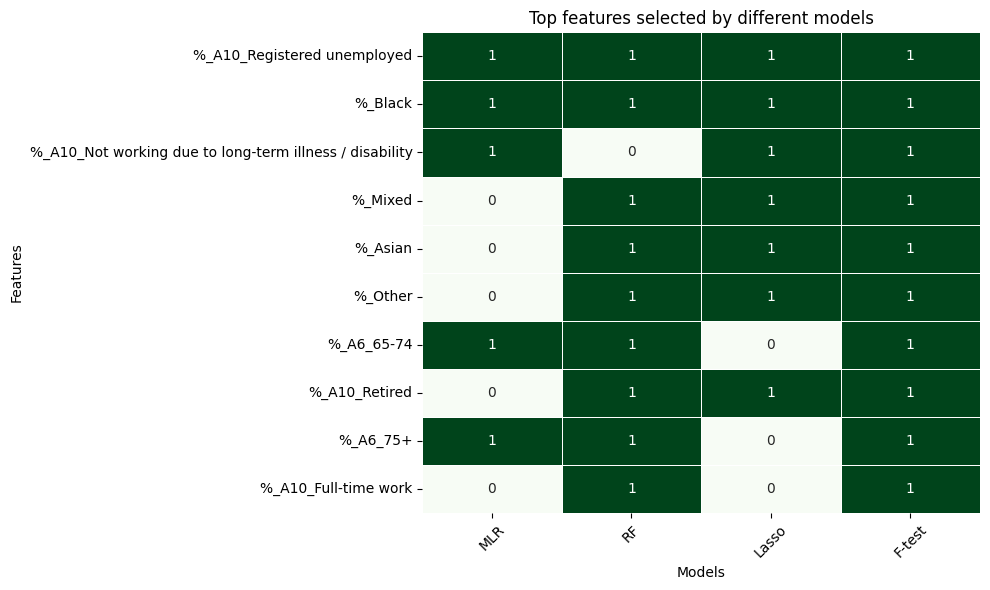

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(Compare_df.drop(columns=['Total models']), annot=True, cmap='Greens', cbar=False, linewidths=0.5)

plt.title("Top features selected by different models")
plt.xlabel("Models")
plt.ylabel("Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()